In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.datasets import load_wine    # built-in data
from sklearn.model_selection import train_test_split    # train, test 데이터 분할
# from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso # 선형 회귀 분석
# from sklearn.metrics import r2_score, mean_squared_error


# 확률을 통해 예측
from sklearn.linear_model import LogisticRegression, SGDClassifier # 로지스틱 회귀 분석 / 선형 분류
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [100]:
X, y = load_wine(return_X_y=True)

# 레이블 개수 확인
print(np.unique(y, return_counts=True))

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))


In [101]:
# LogisticRegression
X, y = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

m = LogisticRegression(solver='liblinear')

m.fit(X_train, y_train)

print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))
print('test pred : ', m.predict(X_test))
print('test target', y_test)

train score :  0.9849624060150376
test score :  0.9333333333333333
test pred :  [0 1 2 2 2 0 1 0 2 1 1 0 0 1 0 0 1 2 2 0 0 1 1 2 1 0 1 2 2 2 1 2 0 1 0 2 1
 1 0 2 0 1 0 1 1]
test target [0 1 2 2 2 0 1 0 2 1 1 0 0 1 1 0 1 2 2 0 0 0 1 2 1 0 1 2 1 2 1 2 0 1 0 2 1
 1 0 2 0 1 0 1 1]


In [102]:
# SGDClassifier
X, y = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

m = SGDClassifier(loss='log_loss')

m.fit(X_train, y_train)

print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))
print('test pred : ', m.predict(X_test))
print('test target', y_test)

train score :  0.6240601503759399
test score :  0.6
test pred :  [0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0
 1 0 0 0 1 0 1 0]
test target [0 1 2 2 2 0 1 0 2 1 1 0 0 1 1 0 1 2 2 0 0 0 1 2 1 0 1 2 1 2 1 2 0 1 0 2 1
 1 0 2 0 1 0 1 1]


130 130
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0]
(array([0, 1]), array([15, 18], dtype=int64))
0.9393939393939394
0.9814814814814815


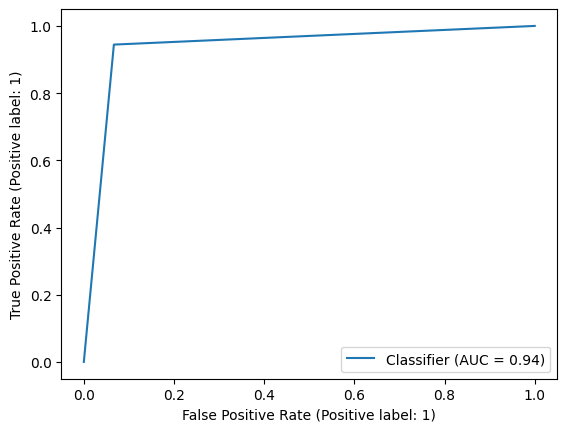

In [103]:
# 세번째 분류(인덱스 2)를 제외, LogisticRegression 후 ROC 그리기
X, y = load_wine(return_X_y=True)

X = X[y != 2]
y = y[y != 2]

# X = X[:-48]
# y = y[:-48]

print(len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)


print(y)

print(y_test)
print(np.unique(y_test, return_counts=True))

# solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
m = LogisticRegression(solver='liblinear') 

m.fit(X_train, y_train)

print(m.score(X_test, y_test))

RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

roc_auc = roc_auc_score(y_test, m.decision_function(X_test))
# roc_auc = roc_auc_score(y_test, m.predict_proba(X_test)[:, 1])
print(roc_auc)
